In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing necessary librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# read the dataset
pd.set_option('display.max_columns',None)
df = pd.read_csv("C:/Users/User/Downloads/innercity.csv")
df.head()

,cid,sold date,price,bed room,bathroom,home area,lot area,tot floors,coast,sight,condition,quality,ceil area,basement area,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3034200666,20141107T000000,808100,4,3.25,3020,13457,1.0,0,0,5,9,3020,0,1956,0,98133,47.7174,-122.336,2120,7553,1,16477
1,8731981640,20141204T000000,277500,4,2.50,2550,7500,1.0,0,0,3,8,1750,800,1976,0,98023,47.3165,-122.386,2260,8800,0,10050
2,5104530220,20150420T000000,404000,3,2.50,2370,4324,2.0,0,0,3,8,2370,0,2006,0,98038,47.3515,-121.999,2370,4348,0,6694
3,6145600285,20140529T000000,300000,2,1.00,820,3844,1.0,0,0,4,6,820,0,1916,0,98133,47.7049,-122.349,1520,3844,0,4664
4,8924100111,20150424T000000,699000,2,1.50,1400,4050,1.0,0,0,4,8,1400,0,1954,0,98115,47.6768,-122.269,1900,5940,0,5450


In [4]:
# read indexes
df.columns

Index(['cid', 'sold date', 'price', 'bed room', 'bathroom', 'home area',
       'lot area', 'tot floors', 'coast', 'sight', 'condition', 'quality',
       'ceil area', 'basement area', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

In [5]:
# overview of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   sold date         21613 non-null  object 
 2   price             21613 non-null  int64  
 3   bed room          21613 non-null  int64  
 4   bathroom          21613 non-null  float64
 5   home area         21613 non-null  int64  
 6   lot area          21613 non-null  int64  
 7   tot floors        21613 non-null  float64
 8   coast             21613 non-null  int64  
 9   sight             21613 non-null  int64  
 10  condition         21613 non-null  int64  
 11  quality           21613 non-null  int64  
 12  ceil area         21613 non-null  int64  
 13  basement area     21613 non-null  int64  
 14  yr_built          21613 non-null  int64  
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [6]:
# missing value check
df.isnull().sum().sum()

0

No missing values found.

In [4]:
# change timestamps in datetime
from datetime import datetime
df['sold date']= pd.to_datetime(df['sold date'])
df['sold yr'] = df['sold date'].dt.year

In [8]:
# importing z-score for scaling
from scipy.stats import zscore

In [5]:
# dropping cid column
df1 = df.drop(['cid'],axis=1)

In [9]:
df_z = df1.drop(['sold date'],axis=1).apply(zscore) # scaling

In [10]:
# Find hidden pattern
# Clustering
# Evaluate intertia of clusters for elbow method
from scipy.spatial.distance import cdist 
clusters = range(1,11)
meanDistortions = []

In [11]:
from sklearn.cluster import KMeans # elbow method
for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(df_z)
    prediction = model.predict(df_z)
    meanDistortions.append(sum(np.min(cdist(df_z,model.cluster_centers_,'euclidean'),axis=1))/df_z.shape[0])

Text(0.5, 1.0, 'Selecting K by Elbow/Knee method')

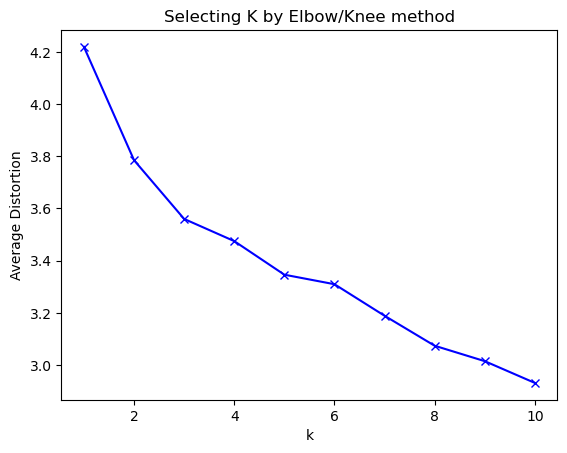

In [13]:
plt.plot(clusters,meanDistortions,'bx-') # plotting elbow method
plt.xlabel('k')
plt.ylabel('Average Distortion')
plt.title("Selecting K by Elbow/Knee method")

No clear Elbow point is seen. Hence, not partitioned the dataset into clusters.

In [14]:
#final_model = KMeans(6)
#final_model.fit(df_z)
#prediction = final_model.predict(df_z)

# Exploratory Data Analysis


In [15]:
df1.columns

Index(['sold date', 'price', 'bed room', 'bathroom', 'home area', 'lot area',
       'tot floors', 'coast', 'sight', 'condition', 'quality', 'ceil area',
       'basement area', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'furnished', 'total_area',
       'sold yr'],
      dtype='object')

###### Number of houses  corresponding to some features 

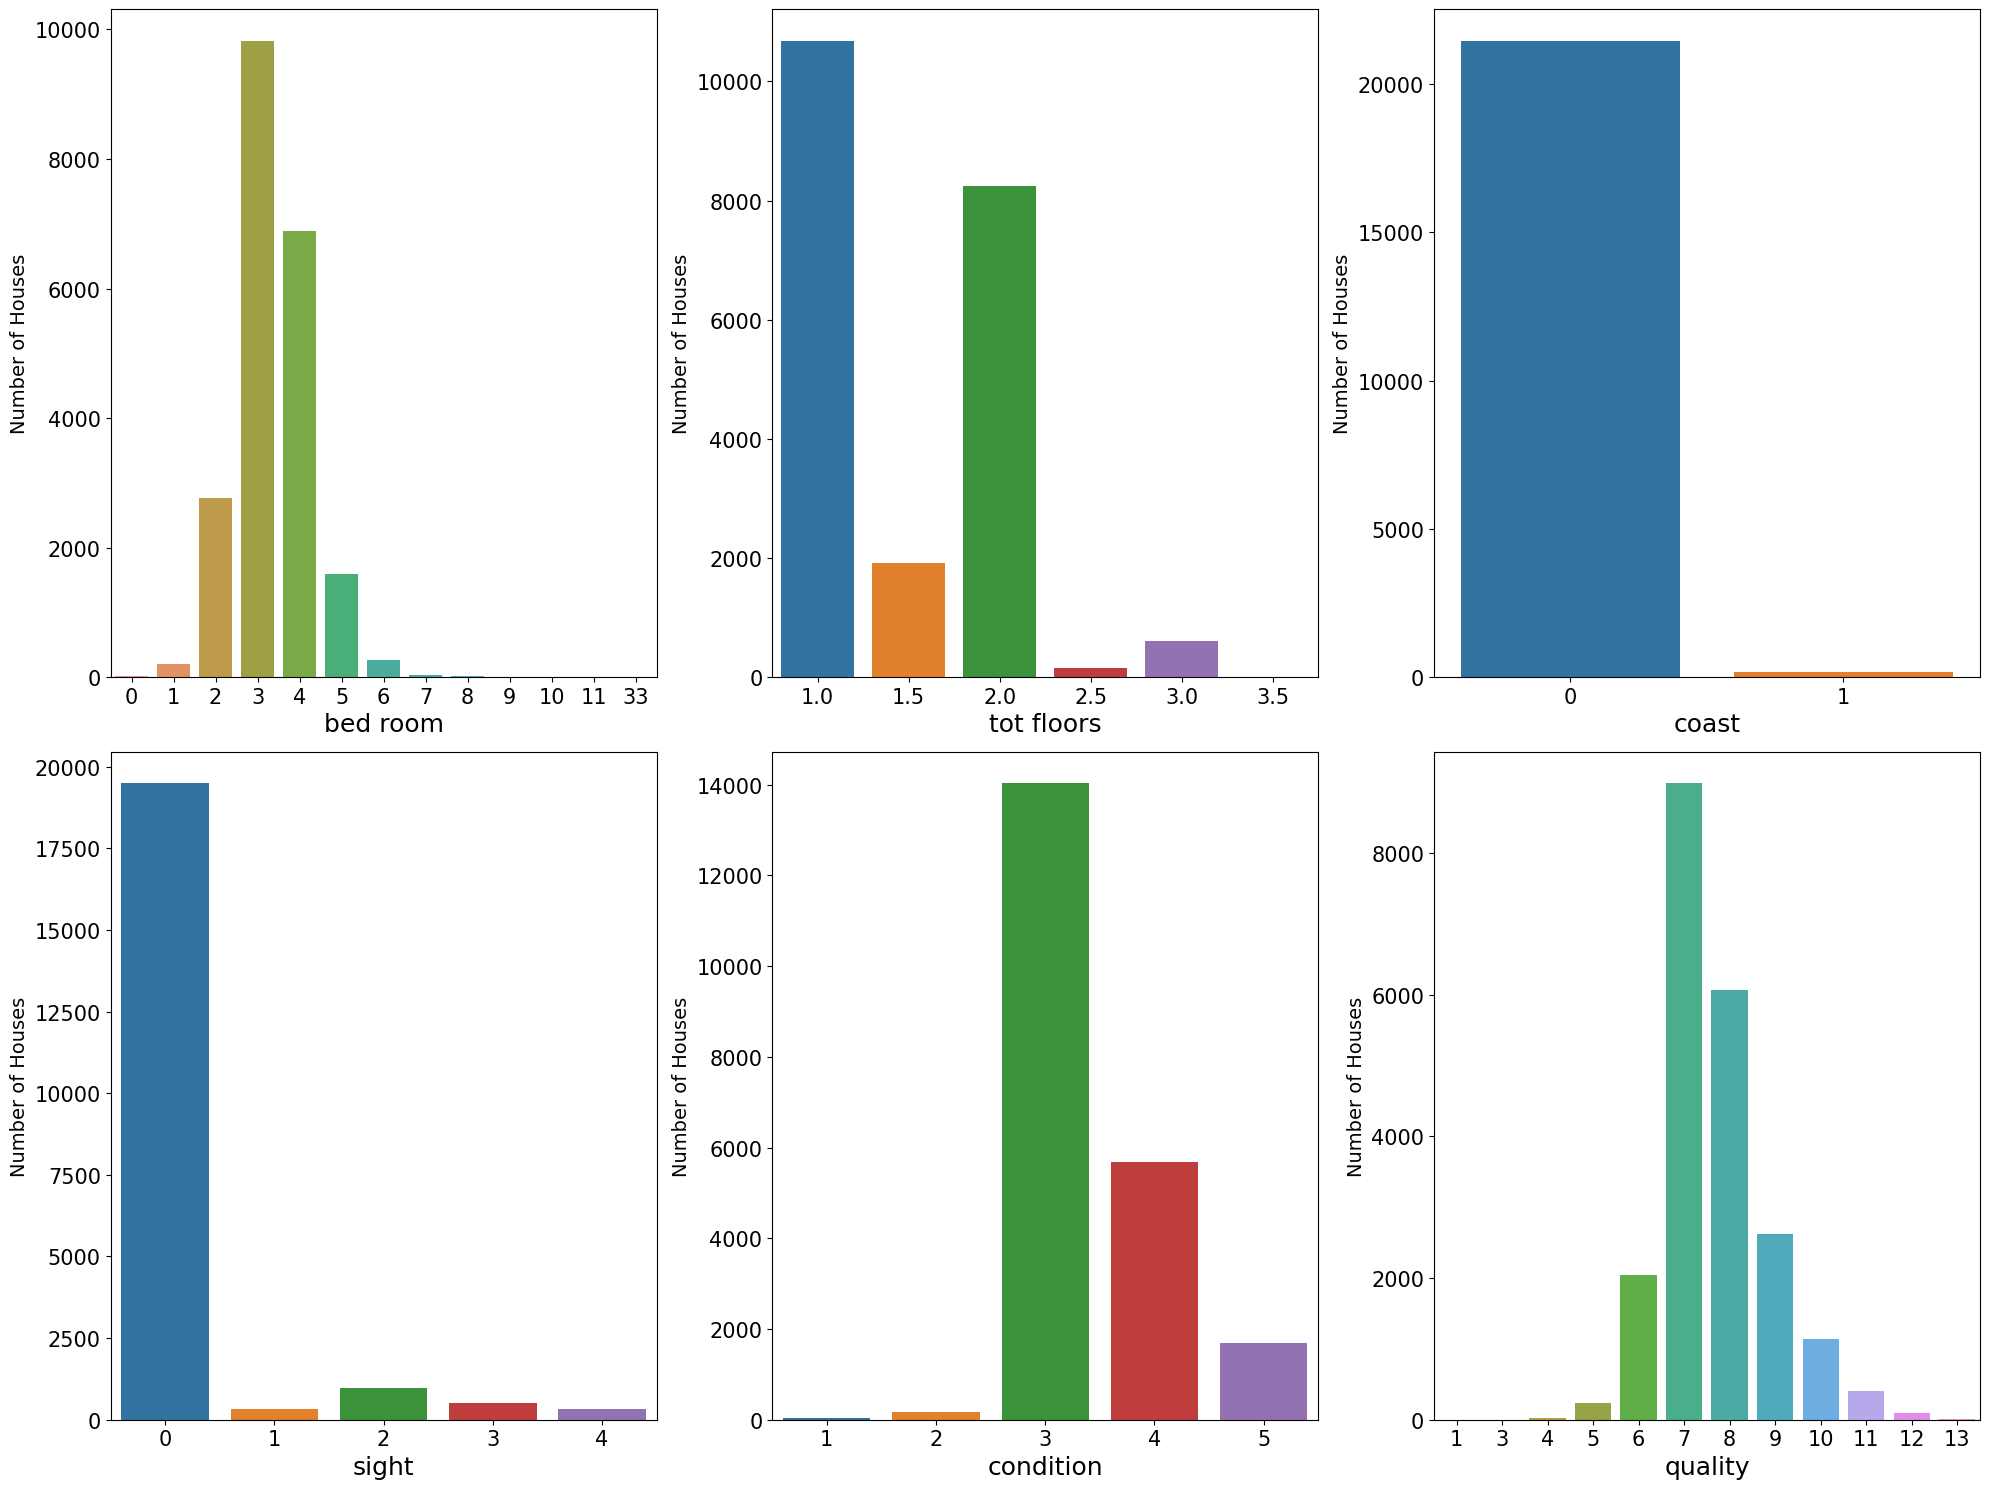

In [16]:
# features 
columns = ['bed room','tot floors','coast', 'sight', 'condition', 'quality'] 
# countplot
fig,ax = plt.subplots(2,3,figsize=(20,15))
for i in range(len(columns)):
    rows = i//3
    cols = i%3
    sns.countplot(data=df1,x=columns[i],ax=ax[rows,cols])
    ax[rows, cols].set_xlabel(columns[i], fontsize=18)
    ax[rows, cols].set_ylabel('Number of Houses', fontsize=14)
    ax[rows, cols].tick_params(axis='x', labelsize=15)
    ax[rows, cols].tick_params(axis='y', labelsize=15)
plt.tight_layout()

##### House Price Analysis

In [17]:
# 10 expensive houses
expensive_houses = df1.sort_values(by='price',ascending=False).head(10)
expensive_houses 

,sold date,price,bed room,bathroom,home area,lot area,tot floors,coast,sight,condition,quality,ceil area,basement area,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,sold yr
16785,2014-10-13,7700000,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800,1,39650,2014
19888,2014-06-11,7060000,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449,1,47365,2014
264,2014-09-19,6890000,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730,1,41264,2014
20917,2014-08-04,5570000,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345,1,44269,2014
17618,2015-04-13,5350000,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750,1,31985,2015
5757,2015-04-13,5300000,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619,1,32219,2015
4789,2014-10-20,5110000,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788,1,53527,2014
668,2014-06-17,4670000,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454,1,22708,2014
1802,2014-08-15,4500000,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408,1,46654,2014
5907,2014-06-18,4490000,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592,1,33947,2014


In [18]:
# 10 cheapest houses
cheap_houses = df1.sort_values(by='price',ascending=True).head(10)
cheap_houses

,sold date,price,bed room,bathroom,home area,lot area,tot floors,coast,sight,condition,quality,ceil area,basement area,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,sold yr
8196,2015-02-17,75000,1,0.00,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882,0,44047,2015
1803,2014-05-06,78000,2,1.00,780,16344,1.0,0,0,1,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387,0,17124,2014
19252,2014-05-23,80000,1,0.75,430,5050,1.0,0,0,2,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500,0,5480,2014
5762,2015-03-24,81000,2,1.00,730,9975,1.0,0,0,1,5,730,0,1943,0,98168,47.4808,-122.315,860,9000,0,10705,2015
14275,2014-11-05,82000,3,1.00,860,10426,1.0,0,0,3,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250,0,11286,2014
3183,2014-05-08,82500,2,1.00,520,22334,1.0,0,0,2,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570,0,22854,2014
21470,2014-05-29,83000,2,1.00,900,8580,1.0,0,0,3,5,900,0,1918,0,98168,47.4727,-122.270,2060,6533,0,9480,2014
7586,2015-04-30,84000,2,1.00,700,20130,1.0,0,0,3,6,700,0,1949,0,98168,47.4752,-122.271,1490,18630,0,20830,2015
16146,2015-03-05,85000,2,1.00,910,9753,1.0,0,0,3,5,910,0,1947,0,98032,47.3897,-122.236,1160,7405,0,10663,2015
15809,2014-09-15,85000,2,1.00,830,9000,1.0,0,0,3,6,830,0,1939,0,98032,47.3813,-122.243,1160,7680,0,9830,2014


In [19]:
# Average house prices by 'sold yr' and 'condition'
df_sold=df1.pivot_table(index='sold yr',columns='condition',values='price',aggfunc='mean')
df_sold.rename_axis('Sold Year',inplace=True)
df_sold.columns = ['Condition-1','Condition-2','Condition-3','Condition-4','Condition-5']
df_sold

,Condition-1,Condition-2,Condition-3,Condition-4,Condition-5
Sold Year,,,,,
2014,277944.736842,311736.666667,539989.744524,521072.924903,611339.036776
2015,432000.000000,350017.842857,546318.534889,521789.978381,616320.215130


##### Price vs others Scatter plot

In [20]:
# selecting columns for scatter analysis
col_names = df1.columns.drop('price')
col_names

Index(['sold date', 'bed room', 'bathroom', 'home area', 'lot area',
       'tot floors', 'coast', 'sight', 'condition', 'quality', 'ceil area',
       'basement area', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'furnished', 'total_area',
       'sold yr'],
      dtype='object')

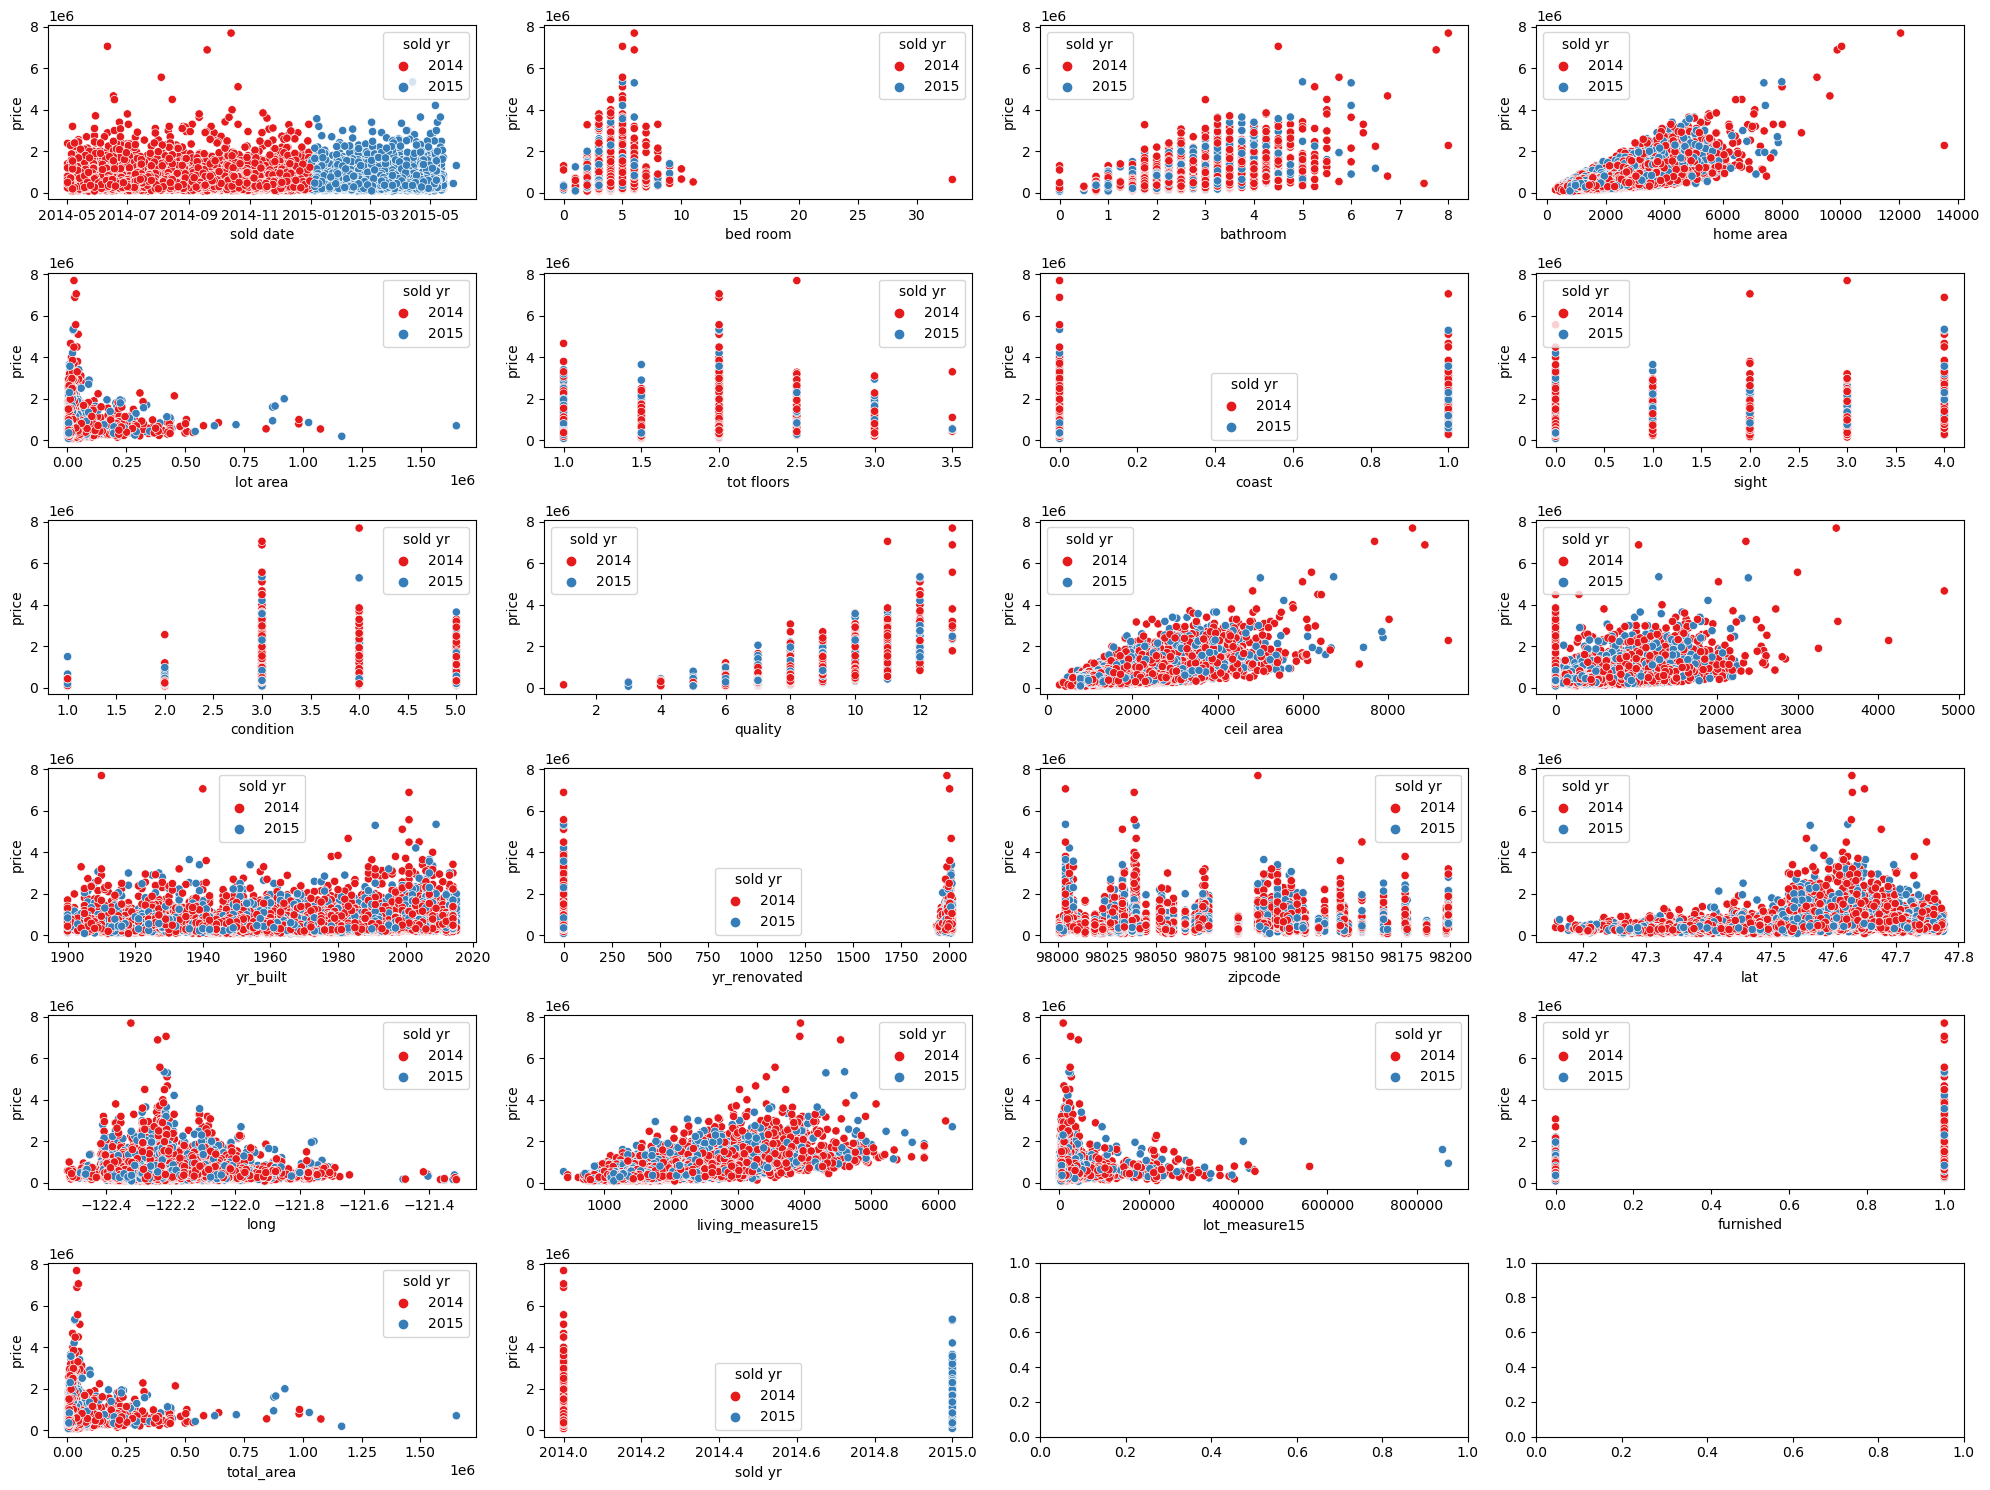

In [21]:
# price vs others scatter plot
fig,ax = plt.subplots(6,4,figsize=(20,15))
for i in range(len(col_names)):
    rows = i//4
    cols = i%4
    scatter = sns.scatterplot(y='price',x=col_names[i],data=df1,hue='sold yr',ax=ax[rows,cols],palette="Set1")
    plt.tight_layout()

##### Correlation between each other


In [22]:
# pearson correlation
corr = df_z.corr()
corr

,price,bed room,bathroom,home area,lot area,tot floors,coast,sight,condition,quality,ceil area,basement area,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,sold yr
price,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456,0.565991,0.104796,0.003554
bed room,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244,0.259268,0.044310,-0.009838
bathroom,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175,0.484923,0.104050,-0.026596
home area,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286,0.632947,0.194209,-0.029038
lot area,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557,0.118883,0.999763,0.005468
tot floors,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269,0.347749,0.002637,-0.022315
coast,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703,0.069882,0.023809,-0.004165
sight,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575,0.220250,0.080693,0.001364
condition,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,-0.121902,-0.010219,-0.045589
quality,0.667463,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248,0.788621,0.130004,-0.030387


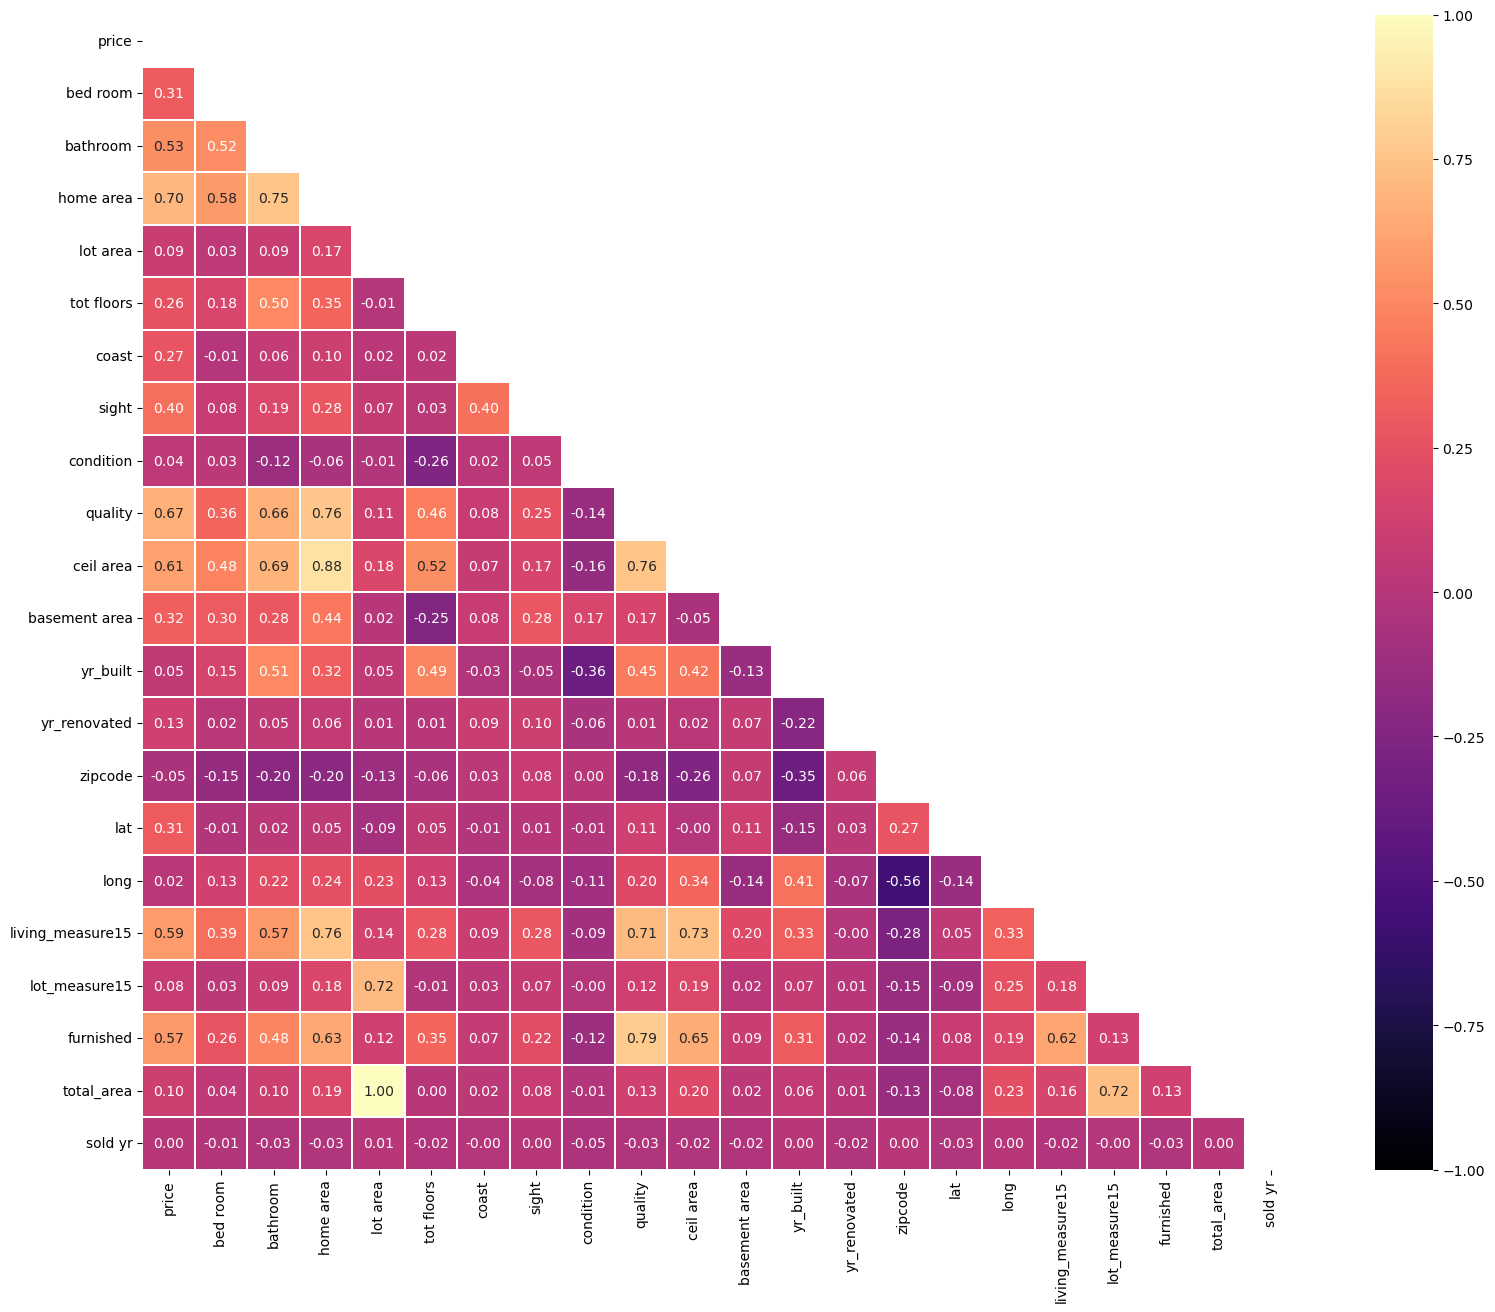

In [23]:
# correlation heatmap
mask = np.triu(np.ones_like(corr))
fig,ax = plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=True,cmap='magma',linewidths=0.05,fmt='.2f',vmax=1.0,vmin=-1,center=0.0,square=True,mask=mask)
plt.show()

In [24]:
# 1 vs price correlation
df1[col_names].corrwith(df1['price'])

bed room            0.308338
bathroom            0.525134
home area           0.702044
lot area            0.089655
tot floors          0.256786
coast               0.266331
sight               0.397346
condition           0.036392
quality             0.667463
ceil area           0.605566
basement area       0.323837
yr_built            0.053982
yr_renovated        0.126442
zipcode            -0.053168
lat                 0.306919
long                0.021571
living_measure15    0.585374
lot_measure15       0.082456
furnished           0.565991
total_area          0.104796
sold yr             0.003554
dtype: float64

Price has strong positive correlation with home area, quality and ceil area respectively 0.702, 0.667 and 0.605.
There is no other features have good correlation with price.


# Data Preprocessing

##### Outliers Detection

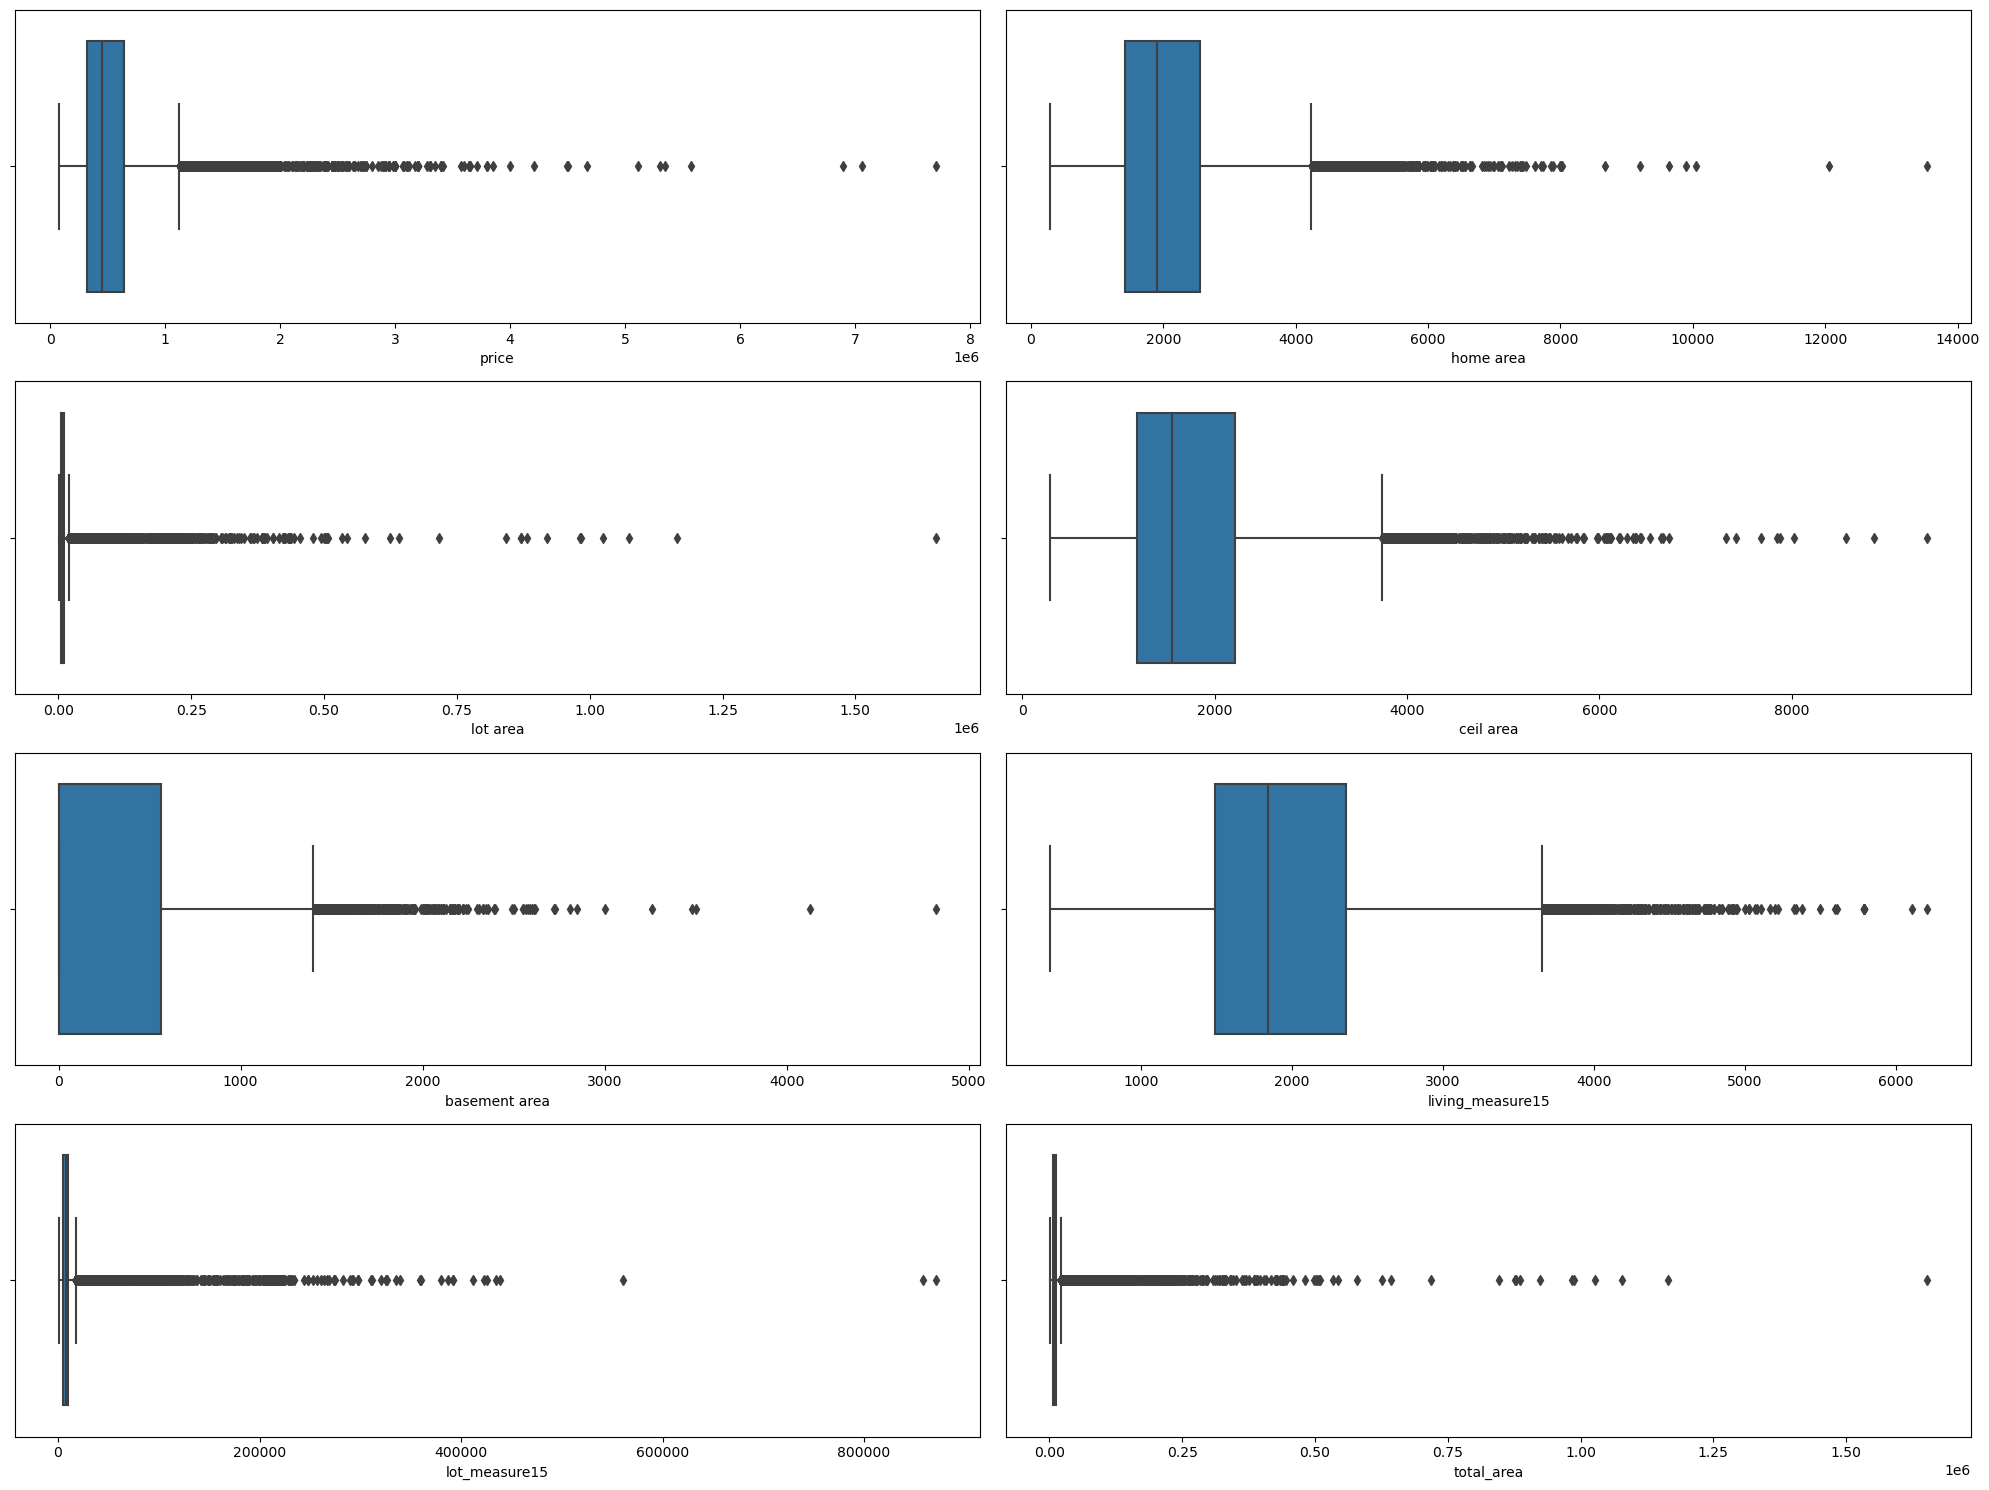

In [36]:
# continuous features
columns = ['price','home area','lot area','ceil area','basement area','living_measure15','lot_measure15','total_area']
# boxplot of all attributes
fig,ax = plt.subplots(4,2,figsize=(20,15))
for i in range(len(columns)):
    rows = i//2
    cols = i%2
    boxplot = sns.boxplot(data=df1,x=columns[i],ax=ax[rows,cols])
    plt.tight_layout()

Multiple attributes have larger number of outliers

In [38]:
# five number summary
# with upper whisker and lower whisker
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3-Q1
df_q = pd.DataFrame({'Q1': Q1.values,
                     'Q3': Q3.values,
                     'IQR': IQR.values},index=Q1.index)
up_whisk = Q3+1.5*IQR
low_whisk = Q1-1.5*IQR

In [39]:
names = df1.columns.drop('sold date')
for i in range(len(names)):
    counts = df1.loc[(df1[names[i]]>up_whisk[names[i]])| (df1[names[i]]<low_whisk[names[i]])].shape[0]
    if i==0:
        print('Number of Outliers')
    print(names[i],':',counts)

Number of Outliers
price : 1159
bed room : 546
bathroom : 571
home area : 572
lot area : 2425
tot floors : 0
coast : 163
sight : 2124
condition : 30
quality : 1911
ceil area : 611
basement area : 496
yr_built : 0
yr_renovated : 914
zipcode : 0
lat : 2
long : 256
living_measure15 : 544
lot_measure15 : 2194
furnished : 4251
total_area : 2419
sold yr : 0


Decision trees are relatively robust to outliers and missing data. Hence, outliers are kept for the DT model

# Feature Engineering

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df1.drop(['price','sold date'],axis=1)
y = df1['price']
# splitting the data set into training set and validation set
# ratio of training and validation set 70:30
X_train,X_val,y_train,y_val = train_test_split(X,y, test_size=0.3,random_state=33)
# scaling training set and test set
X_train = StandardScaler().fit_transform(X_train)
X_val = StandardScaler().fit_transform(X_val)

print(X_train.shape,X_val.shape)
print(y_train.shape,y_val.shape)

(15129, 21) (6484, 21)
(15129,) (6484,)


# Model: Decision Tree Regressor

In [7]:
# necessary libraries
import time
import graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.metrics import mean_absolute_error , mean_squared_error
from scipy.stats import randint as sp_randint

###### Hyperparameter Tunning

In [43]:
# paremeters set
parameters = {'criterion':['squared_error','absolute_error'],
              'max_depth':[12,20,None],
              'min_samples_split': [30,40,50]}
dtr = DecisionTreeRegressor(random_state=45)

In [44]:
# GridSearchCV
gsv = GridSearchCV(dtr,param_grid=parameters,n_jobs=-1,cv=10)
start_time = time.time()
gsv.fit(X_train,y_train)
duration = time.time() - start_time

In [50]:
print(gsv.best_params_)
print(gsv.best_estimator_)

{'criterion': 'squared_error', 'max_depth': 12, 'min_samples_split': 30}
DecisionTreeRegressor(max_depth=12, min_samples_split=30, random_state=45)


In [49]:
# model performance
y_pred =gsv.predict(X_val)
print('gsv Model Performance:')
print('Training Score:', round(gsv.score(X_train,y_train),4)*100)
print('Validation Score:', round(gsv.score(X_val,y_val),4)*100)
print('mse score: %.2f' % mean_squared_error(y_val,y_pred))
print('mae score: %.2f' % mean_absolute_error(y_val,y_pred))
print('Computation time:',round(duration/60,2),'minute')

gsv Model Performance:
Training Score: 88.83
Validation Score: 81.39
mse score: 23996046106.31
mae score: 87471.18
Computation time: 7.31 minute


###### Cross Check of the gsv Model 

Model 1 with min_samples_split=40


In [14]:
# Model 1: CM1
CM1 = DecisionTreeRegressor(max_depth=12,min_samples_split=40,criterion='squared_error',random_state=97)
# fitting the model
CM1.fit(X_train,y_train)
# make prediction
y_pred1 = CM1.predict(X_val)
# model performance
print('CM1 Model Performance:')
print('Training Score:', round(CM1.score(X_train,y_train),4)*100)
print('Validation Score:', round(CM1.score(X_val,y_val),5)*100)
print('mse score: %.2f' % mean_squared_error(y_val,y_pred1))
print('mae score: %.2f' % mean_absolute_error(y_val,y_pred1))

CM1 Model Performance:
Training Score: 88.02
Validation Score: 81.786
mse score: 23489847819.23
mae score: 86962.99


Model 2 with min_samples_split=50

In [58]:
# Model 2: CM2
CM2 = DecisionTreeRegressor(max_depth=12,min_samples_split=50,criterion='squared_error',random_state=93)
# fitting the model
CM2.fit(X_train,y_train)
# make prediction
y_pred2 = CM2.predict(X_val)
# model performance
print('CM2 Model Performance:')
print('Training Score: ', round(CM2.score(X_train,y_train),4)*100)
print('Validation Score:', round(CM2.score(X_val,y_val),4)*100)
print('mse score: %.2f' % mean_squared_error(y_val,y_pred2))
print('mae score: %.2f' % mean_absolute_error(y_val,y_pred2))

CM2 Model Performance:
Training Score:  87.69
Validation Score: 81.72
mse score: 23578397237.86
mae score: 87283.48


###### Comment:
Comparing three model CM1 model gives better performance than gsv and CM2 model considering 'mae score' and 'mse score'.

###### Visualizing the tree

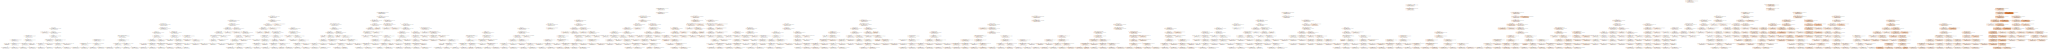

In [59]:
# plotting tree
dot_data = tree.export_graphviz(CM1, out_file=None, 
                                feature_names=X.columns,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
#graph.render('decision_tree',format='png',cleanup=True)  # Saves the tree as a PDF file
graph

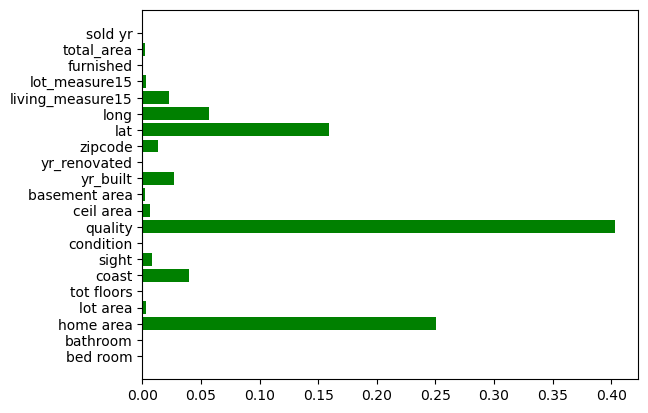

In [65]:
# important features
plt.barh(range(X.shape[1]), CM1.feature_importances_, align='center',color='green')
plt.yticks(np.arange(X.shape[1]),X.columns)
plt.show()

# K Fold Cross Validation

In [15]:
# necessary libraries
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [19]:
# validation scores
num_folds = 100
seed = 48
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
# CM1 model
model = DecisionTreeRegressor(max_depth=12,min_samples_split=40,criterion='squared_error',random_state=None)
start_time = time.time()
results = cross_val_score(model,X,y,cv=kfold)
duration = time.time()-start_time
print(results)
print('Computation time:',round(duration/60,2),'minute')

[0.78834472 0.84049795 0.81863466 0.80744512 0.86246207 0.87289417
 0.77878073 0.84371494 0.88973277 0.84550762 0.78321297 0.86069736
 0.79183745 0.62070135 0.75395319 0.78364474 0.81493363 0.79014699
 0.85866367 0.81203982 0.8371731  0.83028867 0.66756291 0.89182936
 0.65021833 0.74037202 0.80694636 0.81190649 0.86534048 0.83349518
 0.88204906 0.87475291 0.88576673 0.75131274 0.66138131 0.8812053
 0.78162846 0.58953497 0.83630378 0.85436202 0.81470216 0.74981908
 0.88290896 0.77363794 0.80571947 0.46597383 0.77310115 0.89388484
 0.88263974 0.81521056 0.79891472 0.80140389 0.85665884 0.894552
 0.86678461 0.87141364 0.81229062 0.88684119 0.74391611 0.83582675
 0.84250423 0.77781369 0.86015628 0.79929406 0.83888887 0.85831417
 0.74309398 0.77465021 0.8680768  0.87965422 0.86968522 0.82666319
 0.79114813 0.86800009 0.76976408 0.77895899 0.88504301 0.78593527
 0.8625241  0.77180096 0.72528019 0.80925316 0.83674233 0.80651137
 0.86223291 0.74168202 0.8180205  0.85269883 0.8651005  0.8306814

Cross Validation Score Analysis

In [29]:
print("Minimum Score: %.2f"%(min(results)*100))
print("Average Score: %.2f"%(results.mean()*100))
print("Maximum Score: %.2f"%(max(results)*100))
print("Standard deviation of Score: %.2f"%(results.std()*100))

Minimum Score: 43.49
Average Score: 80.70
Maximum Score: 89.46
Standard deviation of Score: 7.89


Model Performance at 95% confidence interval

In [31]:
# standard deviation of scores
std = results.std()*100
# mean of scores
mean = results.mean()*100
# lower score at 95% confidence interval
low_score = mean - (1.96*std)
# upper score at 95% confidence interval
up_score = mean + (1.96*std)
# interval
print("Model Performance at 95%% confidence interval (%.2f , %.2f)"%(low_score,up_score))

Model Performance at 95% confidence interval (65.24 , 96.16)
